In [1]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal as sp

# Load the raw collection
s = np.fromfile(open("rawData"), dtype=np.complex64)

# Notes from Matthew
Fs = 1e6
Fc = 433946924

# Setup a time axis
t = np.arange(s.size) / Fs

In [2]:
def filterSignal(s, timeframe, Fs):
    # Low =-pass filter the data
    h = sp.firwin(numtaps=101, cutoff=1, nyq=Fs/2)
    s_filtered = np.abs(sp.lfilter(h, 1.0, s[timeframe]))
    return s_filtered

def getStartTime(s):
    # Find the start of the first data chunk
    start = 0
    for i, item in enumerate(s):
        if(item > 0.05):
            start = i
            break
    if(start == 0):
        # no signal found
        return -1
    else:
        return start

def signal_to_data(s_filtered):
    print("Total Signal Length: ", s_filtered.size)
    # First find the mean amplitude of the filtered data signal
    avg = sum(s_filtered) / s_filtered.size
    # Anything that is below the mean is 0, and anything above is 1
    scaled = s_filtered.copy()
    for i, item in enumerate(scaled):
        if item < avg:
            scaled[i] = 0
        else:
            scaled[i] = 1
    # Find the duration of each peak and place them into an array
    durations = []
    bits = []
    prevVal = scaled[0]
    duration = 0
    for i in range(scaled.size):
        if(scaled[i] == prevVal):
            duration = duration + 1
        else:
            durations.append(duration)
            if(duration > 580):
                bits.append(bool(prevVal))
                bits.append(bool(prevVal))
                bits.append(bool(prevVal))
            elif(duration > 380):
                bits.append(bool(prevVal))
                bits.append(bool(prevVal))
            else:
                bits.append(bool(prevVal))
            duration = 0 # reset the duration "timer"
        prevVal = scaled[i]

    # find the max and min durations
    maxDuration = np.max(durations)
    minDuration = np.min(durations)
    print('Min Duration:', minDuration)
    print('Max Duration:', maxDuration)
    print('Total Pulses:', len(durations))
    print('Number of Bits:', len(bits))
    print(durations)
    
    # traverse the durations array and decode it (if short to long, 0; if long to short, 1) (ignore preamble)
    decoded = []
    # find start of the actual bit data
    start = 0
    
    for i in range(26, len(bits)):
        if(bits[i - 2] == 1 and bits[i - 1] == 1 and bits[i] == 0):
            # 400 high then 200 low, so bit of 1
            decoded.append(1)
        elif(bits[i - 2] == 1 and bits[i - 1] == 0 and bits[i] == 0):
            # 200 high then 400 low, so bit of 0
            decoded.append(0)
    print(len(decoded))
    print(decoded)
    
    byteStr = ""
    for b in bits:
        byteStr += str(int(b))
    return byteStr

def compare_byteStrings(b1, b2, b3):
    return b1 == b2 and b2 == b3

In [3]:
# plt.figure(figsize=(12,5))
# plt.plot(t, np.abs(s))
# plt.xlabel('Time')
# plt.ylabel('$|s|$')
# plt.grid()
# plt.show()

In [4]:
# plt.figure(figsize=(12,5))
# plt.plot(t, np.abs(s))
# plt.xlabel('Time')
# plt.ylabel('$|s|$')
# plt.xlim(6, 6.25)
# plt.grid()
# plt.show()

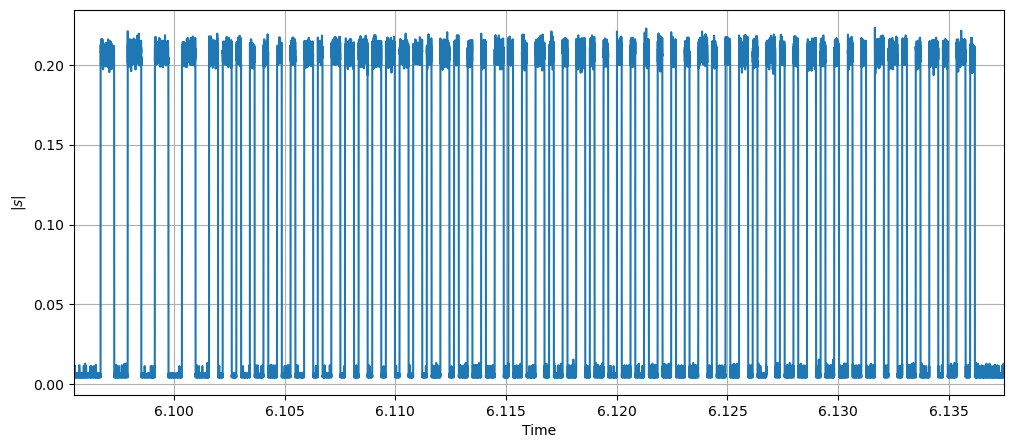

In [5]:
plt.figure(figsize=(12,5))
plt.plot(t, np.abs(s))
plt.xlabel('Time')
plt.ylabel('$|s|$')
plt.xlim(6.0955, 6.1375)
plt.grid()
plt.show()

In [6]:
# # Plot just the real
# plt.figure(figsize=(12,5))
# plt.plot(t, np.real(s))
# plt.xlabel('Time')
# plt.ylabel('$|s|$')
# plt.xlim(6.012, 6.054)
# plt.grid()
# plt.show()

In [7]:
# # Plot just the imaginary
# plt.figure(figsize=(12,5))
# plt.plot(t, np.imag(s))
# plt.xlabel('Time')
# plt.ylabel('$|s|$')
# plt.xlim(6.012, 6.054)
# plt.grid()
# plt.show()

In [8]:
# timeframe1 = np.where(np.logical_and(t>=6.012, t<=6.054))[0]
# timeframe2 = np.where(np.logical_and(t>=6.05375, t<=6.09575))[0]
# timeframe3 = np.where(np.logical_and(t>=6.0955, t<=6.1375))[0]
startTime = (getStartTime(s)/Fs) - 0.002
print(startTime)
timeframe1 = np.where(np.logical_and(t>=startTime, t<=startTime+0.042))[0]
timeframe2 = np.where(np.logical_and(t>=startTime+0.042, t<=startTime+0.084))[0]
timeframe3 = np.where(np.logical_and(t>=startTime+0.084, t<=startTime+0.126))[0]

6.0111930000000005


In [9]:
# # Make an IQ plot
# plt.figure(figsize=(5,5))
# plt.plot(np.real(s[timeframe1]), np.imag(s[timeframe1]), '.', ms=1)
# plt.xlabel('Real')
# plt.ylabel('Imaginary')
# plt.xlim(-0.3,0.3)
# plt.ylim(-0.3,0.3)
# plt.gca().set_aspect('equal')
# plt.grid()
# plt.show()

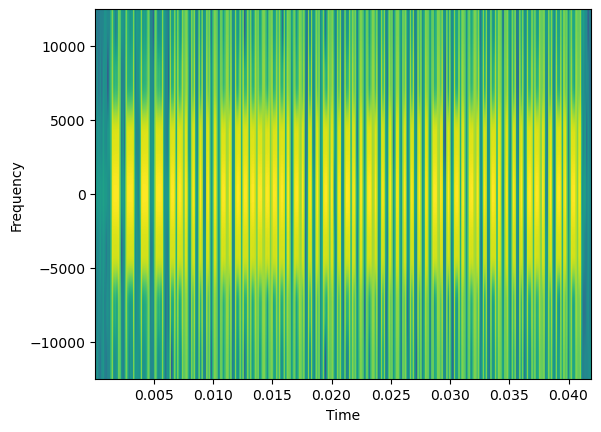

In [10]:
plt.specgram(s[timeframe3], Fs=Fs)
plt.ylim(-12500,12500)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [11]:
s_filtered1 = filterSignal(s, timeframe1, Fs)
b1 = signal_to_data(s_filtered1)
print(b1)

Total Signal Length:  42000
Min Duration: 203
Max Duration: 2047
Total Pulses: 122
Number of Bits: 196
[2047, 616, 607, 616, 606, 617, 606, 616, 606, 410, 204, 410, 204, 219, 391, 219, 392, 218, 392, 218, 392, 219, 392, 410, 203, 219, 392, 410, 204, 410, 204, 410, 204, 410, 204, 410, 204, 410, 204, 410, 205, 218, 392, 409, 205, 218, 392, 218, 392, 218, 393, 409, 205, 218, 392, 218, 392, 410, 204, 218, 392, 219, 392, 409, 205, 218, 392, 218, 392, 219, 391, 219, 392, 218, 392, 218, 392, 219, 391, 219, 392, 410, 204, 218, 392, 219, 391, 410, 205, 218, 392, 410, 204, 218, 392, 218, 392, 410, 205, 218, 392, 218, 392, 218, 392, 219, 391, 410, 205, 409, 205, 218, 392, 218, 392, 410, 204, 219, 391, 410, 205, 218]
56
[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]
00011100011100011100011100011011010010010010010011010011011011011011011011010011010010010011010010011010010011010

In [12]:
s_filtered2 = filterSignal(s, timeframe2, Fs)
b2 = signal_to_data(s_filtered2)
print(b2)

Total Signal Length:  42001
Min Duration: 203
Max Duration: 1796
Total Pulses: 122
Number of Bits: 196
[1796, 616, 606, 617, 606, 616, 606, 617, 606, 410, 204, 410, 204, 219, 391, 218, 393, 218, 392, 218, 392, 219, 391, 410, 204, 219, 392, 410, 204, 410, 204, 410, 204, 410, 204, 410, 204, 410, 204, 410, 204, 218, 392, 410, 204, 219, 391, 219, 392, 218, 392, 410, 204, 218, 392, 219, 392, 410, 204, 218, 392, 218, 392, 410, 204, 218, 393, 218, 392, 218, 392, 219, 392, 218, 392, 218, 392, 218, 392, 219, 391, 410, 205, 218, 392, 218, 392, 410, 204, 219, 391, 411, 203, 219, 392, 218, 392, 410, 204, 218, 393, 218, 392, 218, 392, 218, 392, 410, 205, 409, 205, 218, 392, 218, 392, 410, 204, 218, 392, 410, 204, 218]
56
[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]
00011100011100011100011100011011010010010010010011010011011011011011011011010011010010010011010010011010010011010

In [13]:
s_filtered3 = filterSignal(s, timeframe3, Fs)
b3 = signal_to_data(s_filtered3)
print(b3)

Total Signal Length:  42001
Min Duration: 203
Max Duration: 1544
Total Pulses: 122
Number of Bits: 196
[1544, 616, 606, 616, 606, 617, 606, 616, 606, 410, 205, 410, 203, 219, 392, 218, 393, 217, 393, 218, 392, 218, 392, 410, 204, 218, 392, 410, 205, 409, 204, 410, 204, 410, 204, 411, 203, 410, 205, 409, 205, 218, 392, 410, 204, 218, 392, 219, 392, 218, 392, 409, 205, 218, 392, 218, 392, 410, 204, 219, 392, 218, 392, 410, 204, 218, 392, 219, 391, 219, 392, 218, 392, 219, 391, 219, 391, 219, 392, 218, 392, 410, 204, 219, 392, 218, 392, 409, 205, 218, 392, 410, 204, 218, 392, 219, 392, 409, 205, 218, 392, 218, 392, 219, 391, 219, 392, 410, 204, 410, 204, 218, 392, 219, 392, 409, 205, 218, 392, 410, 204, 218]
56
[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]
00011100011100011100011100011011010010010010010011010011011011011011011011010011010010010011010010011010010011010

In [14]:
print(compare_byteStrings(b1, b2, b3))

True
